# **Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from tabulate import tabulate
from sklearn.model_selection import train_test_split

# **Data Import**

In [3]:
#Import Data
dataset = pd.read_csv("loan_data_2007_2014.csv", sep=',', decimal='.', low_memory=False)

#Copy the primary data for backup
data = dataset.copy()

#Drop Index
data.drop(columns='Unnamed: 0',inplace=True)
print(tabulate(data.head(10), headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤═════════╤═════════════╤═════════════╤═══════════════╤═══════════════════╤═══════════╤════════════╤═══════════════╤═════════╤═════════════╤═══════════════════════════╤══════════════╤══════════════════╤══════════════╤═══════════════════════╤═══════════╤═══════════════╤══════════════╤══════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════╤════════════════════════════

# **Basic Data Exploration**

In [4]:
#Shape
data.shape

(466285, 74)

In [5]:
#Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

**Make Target Variable (Y)**

In [6]:
#Make Target Variable, Where Bad Credit was Charged Off, Default, and Late Credit
data['Target'] = np.where((data['loan_status'] =='Default') | 
                         (data['loan_status'] =='Charged Off') | 
                         (data['loan_status'] =='Late (31-120 days)') | 
                         (data['loan_status'] =='Late (16-30 days)') | 
                         (data['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),
                          'Risky','Not Risky')
data['Target']

0         Not Risky
1             Risky
2         Not Risky
3         Not Risky
4         Not Risky
            ...    
466280    Not Risky
466281        Risky
466282    Not Risky
466283    Not Risky
466284    Not Risky
Name: Target, Length: 466285, dtype: object

In [7]:
#Delete the Loan Status Variable, Coz it has been extracted to Target
data.drop('loan_status', axis=1, inplace=True);

Good Credit Counts: 414099 and was the majority with 88.81 %
Bad Credit Counts: 52186 and was the minority with 11.19 %



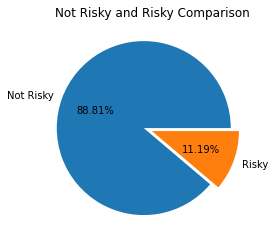

In [8]:
#Good Credit vs Bad Credit
print('Good Credit Counts: ' + str(len(data[data['Target'] == 'Not Risky'])) 
      + ' and was the majority with ' 
      + str(format(len(data[data['Target'] == 'Not Risky'])*100/len(data['Target']), ".2f"))
      + ' %')
print('Bad Credit Counts: ' + str(len(data[data['Target'] == 'Risky'])) 
      + ' and was the minority with ' 
      + str(format(len(data[data['Target'] == 'Risky'])*100/len(data['Target']), ".2f"))
      + ' %')
print()

#PieChart
plt.pie([str(len(data[data['Target'] == 'Not Risky'])), str(len(data[data['Target'] == 'Risky']))],
        labels=['Not Risky', 'Risky'], 
        autopct='%.2f%%',
        explode = [0.1, 0])
plt.title('Not Risky and Risky Comparison')
plt.show()

In [9]:
#Fund Loss from bad credit (Sum from all funded_amount - total_payment)
fund_loss = sum(data[data['Target'] == 'Risky']['funded_amnt'])-sum(data[data['Target'] == 'Risky']['total_pymnt'])
total_fund = sum(data['funded_amnt'])
percent_loss = (fund_loss/total_fund)*100
print('Bad Credit fund loss : ' + "$" + str(format(fund_loss, ".2f")))
print('Total Fund : ' + "$" + str(format(total_fund, ".2f")))
print('Percentage Loss : ' + str(format(percent_loss, ".2f") + "%"))

Bad Credit fund loss : $394351677.72
Total Fund : $6664052450.00
Percentage Loss : 5.92%


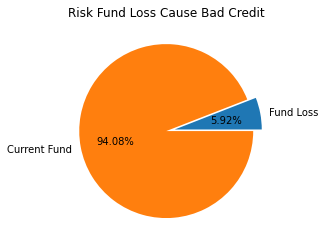

In [70]:
#PieChart
plt.pie([fund_loss, total_fund-fund_loss],
        labels=['Fund Loss', 'Current Fund'], 
        autopct='%.2f%%',
        explode = [0.1, 0])
plt.title('Risk Fund Loss Cause Bad Credit')
plt.show()

Jumlah kerugian akibat 11.19% peminjam tidak bisa membayar adalah 5.92% dari total pinjaman sejumlah $394,351,677.72

**Split the Categorical and Numeric Variable**

In [10]:
#Drop All-Null Column
for column in data.columns:
  length = len(data[column])
  number_of_missing = data[column].isna().sum()
  if length == number_of_missing:
    data.drop(column, axis = 1, inplace = True)

In [11]:
#Split Categorical and Numeric Variable
numeric_vars = []
categorical_vars = []

for i in data.columns:
  if data[i].dtype == 'object':
    categorical_vars.append(i)
  else:
    numeric_vars.append(i)

print('Count of Numerical Vars: ',len(numeric_vars))
print('Numerical Vars: ',numeric_vars)
print()
print('Count of Categorical Vars: ',len(categorical_vars))
print('Categorical Vars = ',categorical_vars)

Count of Numerical Vars:  35
Numerical Vars:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

Count of Categorical Vars:  22
Categorical Vars =  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'Target']


# **Data Cleaning**

**Deal With Missing Data (Numerical)**

In [12]:
#Observate the Data
data[numeric_vars].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


drop the policy_code columns, it has 0 standard deviation and will not help at all in model-building

In [13]:
#drop policy_code
data.drop('policy_code', axis = 1, inplace = True)
numeric_vars.remove('policy_code')

In [14]:
#Missing Data Percentage (Before)
for column in numeric_vars:
  length = len(data[column])
  number_of_missing = data[column].isna().sum()
  precentage_of_missing = number_of_missing*100/length
  print('Precentage of Missing Value from Column ' + str(column) + ' is ' + str(format(precentage_of_missing, ".2f") + '%'))

Precentage of Missing Value from Column id is 0.00%
Precentage of Missing Value from Column member_id is 0.00%
Precentage of Missing Value from Column loan_amnt is 0.00%
Precentage of Missing Value from Column funded_amnt is 0.00%
Precentage of Missing Value from Column funded_amnt_inv is 0.00%
Precentage of Missing Value from Column int_rate is 0.00%
Precentage of Missing Value from Column installment is 0.00%
Precentage of Missing Value from Column annual_inc is 0.00%
Precentage of Missing Value from Column dti is 0.00%
Precentage of Missing Value from Column delinq_2yrs is 0.01%
Precentage of Missing Value from Column inq_last_6mths is 0.01%
Precentage of Missing Value from Column mths_since_last_delinq is 53.69%
Precentage of Missing Value from Column mths_since_last_record is 86.57%
Precentage of Missing Value from Column open_acc is 0.01%
Precentage of Missing Value from Column pub_rec is 0.01%
Precentage of Missing Value from Column revol_bal is 0.00%
Precentage of Missing Value

In [15]:
#Drop Column with Percentage of Missing values > 40%, If missing value < 40% replace it with median
for column in numeric_vars:
  portion_missing = data[column].isna().sum()/len(data[column])
  if portion_missing > 0.4:
    data.drop(column, axis=1, inplace = True)
    numeric_vars.remove(column)
  else:
    data[column].fillna(data[column].median(), inplace = True)

In [16]:
#Missing Data Percentage (After)
for column in numeric_vars:
  length = len(data[column])
  number_of_missing = data[column].isna().sum()
  precentage_of_missing = number_of_missing*100/length
  print('Precentage of Missing Value from Column ' + str(column) + ' is ' + str(format(precentage_of_missing, ".2f") + '%'))

Precentage of Missing Value from Column id is 0.00%
Precentage of Missing Value from Column member_id is 0.00%
Precentage of Missing Value from Column loan_amnt is 0.00%
Precentage of Missing Value from Column funded_amnt is 0.00%
Precentage of Missing Value from Column funded_amnt_inv is 0.00%
Precentage of Missing Value from Column int_rate is 0.00%
Precentage of Missing Value from Column installment is 0.00%
Precentage of Missing Value from Column annual_inc is 0.00%
Precentage of Missing Value from Column dti is 0.00%
Precentage of Missing Value from Column delinq_2yrs is 0.00%
Precentage of Missing Value from Column inq_last_6mths is 0.00%
Precentage of Missing Value from Column mths_since_last_record is 86.57%
Precentage of Missing Value from Column open_acc is 0.00%
Precentage of Missing Value from Column pub_rec is 0.00%
Precentage of Missing Value from Column revol_bal is 0.00%
Precentage of Missing Value from Column revol_util is 0.00%
Precentage of Missing Value from Column 

In [17]:
#drop mths_since_last_record manually
data.drop('mths_since_last_record', axis=1, inplace = True)
numeric_vars.remove('mths_since_last_record')

The Missing data problem of Numerical Variable has been solved

**Deal With Missing Data (Categorical)**

In [18]:
#Data Checking
data[categorical_vars].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
url,466285,466285,https://www.lendingclub.com/browse/loanDetail....,1


drop emp_title, url, desc, title, zip_code, addr_state, sub_grade coz there is so many unique values, 

drop application type coz its only had one value, 

convert issue_d, last_pymnt_d, next_pymnt_d, earliest_cr_line, last_credit_pull_d to datetime

In [19]:
#Drop Columns
columns_to_drop = ['emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'sub_grade', 'application_type']
data.drop(columns_to_drop, axis = 1, inplace = True)
for i in columns_to_drop:
  categorical_vars.remove(i)

In [20]:
#Convert to Datetime and Remove it from categorical variable category
convert_to_date = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']
date_vars = convert_to_date
for i in convert_to_date:
  data[i] = pd.to_datetime(data[i], format = '%b-%y')
for i in date_vars:
  categorical_vars.remove(i)

In [21]:
#Check Again
data[categorical_vars].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
initial_list_status,466285,2,f,303005
Target,466285,2,Not Risky,414099


**Deal With Data (Datetime)**

In [22]:
#Data Checking
data[date_vars].describe().transpose()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_15336/2809234172.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data[date_vars].describe().transpose()


,count,unique,top,freq,first,last
issue_d,466285,91,2014-10-01,38782,2007-06-01,2014-12-01
last_pymnt_d,465909,98,2016-01-01,179620,2007-12-01,2016-01-01
next_pymnt_d,239071,100,2016-02-01,208393,2007-12-01,2016-03-01
earliest_cr_line,466256,664,2000-10-01,3674,1969-01-01,2068-12-01
last_credit_pull_d,466243,103,2016-01-01,327699,2007-05-01,2016-01-01


In [23]:
#Split each datetime variable into year and month
#issue_d
data['m_issue_d'] = data['issue_d'].dt.month
data['y_issue_d'] = data['issue_d'].dt.year

#last_pymnt_d
data['m_last_pymnt_d'] = data['last_pymnt_d'].dt.month
data['y_last_pymnt_d'] = data['last_pymnt_d'].dt.year

#next_pymnt_d
data['m_next_pymnt_d'] = data['next_pymnt_d'].dt.month
data['y_next_pymnt_d'] = data['next_pymnt_d'].dt.year

#earliest_cr_line
data['m_earliest_cr_line'] = data['earliest_cr_line'].dt.month
data['y_earliest_cr_line'] = data['earliest_cr_line'].dt.year

#last_credit_pull_d
data['m_last_credit_pull_d'] = data['last_credit_pull_d'].dt.month
data['y_last_credit_pull_d'] = data['last_credit_pull_d'].dt.year

#Drop old datetime variable
data.drop(date_vars, axis = 1, inplace = True)
date_vars = ['m_issue_d', 'y_issue_d', 'm_last_pymnt_d', 'y_last_pymnt_d', 'm_next_pymnt_d', 'y_next_pymnt_d', 'm_earliest_cr_line', 'y_earliest_cr_line', 'm_last_credit_pull_d', 'y_last_credit_pull_d']

**Deal With Data (All)**

In [24]:
#Drop Rows with NaN
data = data.dropna(axis=0)

**Check The Skewness and/or Condition of Data**

Categorical Data

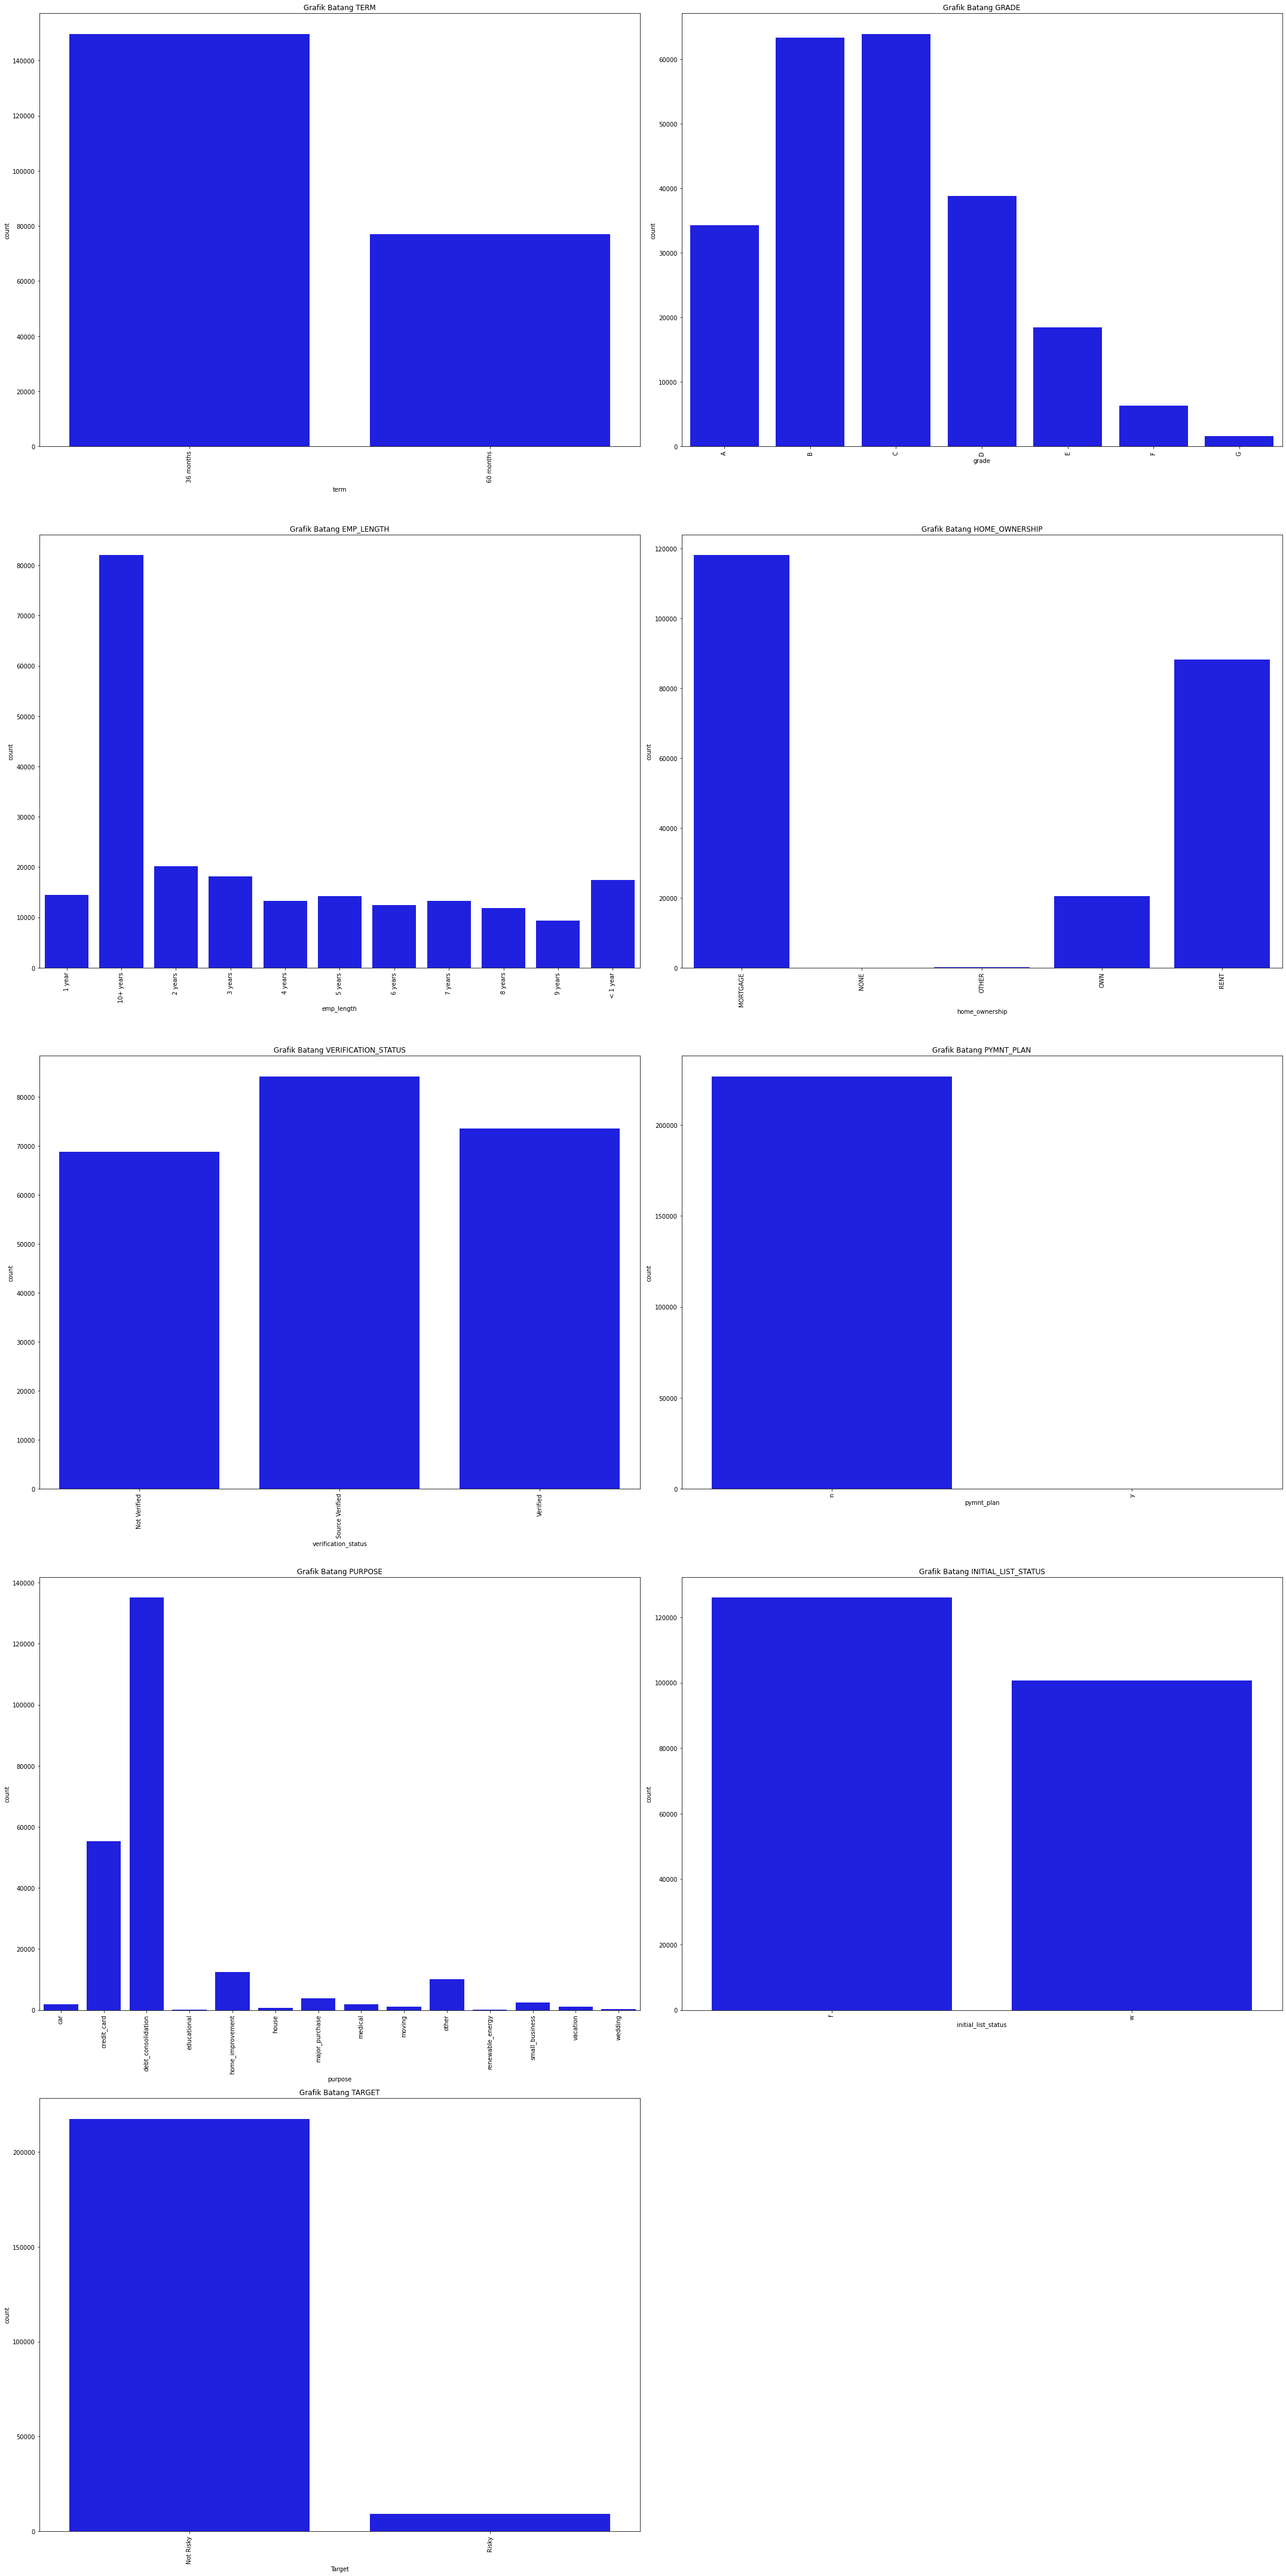

In [25]:
#Categorical Data
plt.figure(figsize=(30,60))
for i in range(0, len(categorical_vars)):
    plt.subplot(5, 2, i+1)
    plt.title('Grafik Batang ' + str(categorical_vars[i]).upper())
    sns.countplot(x=data[categorical_vars[i]].sort_values(), color='blue')
    plt.xlabel(categorical_vars[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

drop pymnt_plan coz got severe case of imbalance

In [26]:
#Drop Payment Plan
data.drop('pymnt_plan', axis = 1, inplace = True)
categorical_vars.remove('pymnt_plan')

Numerical Data

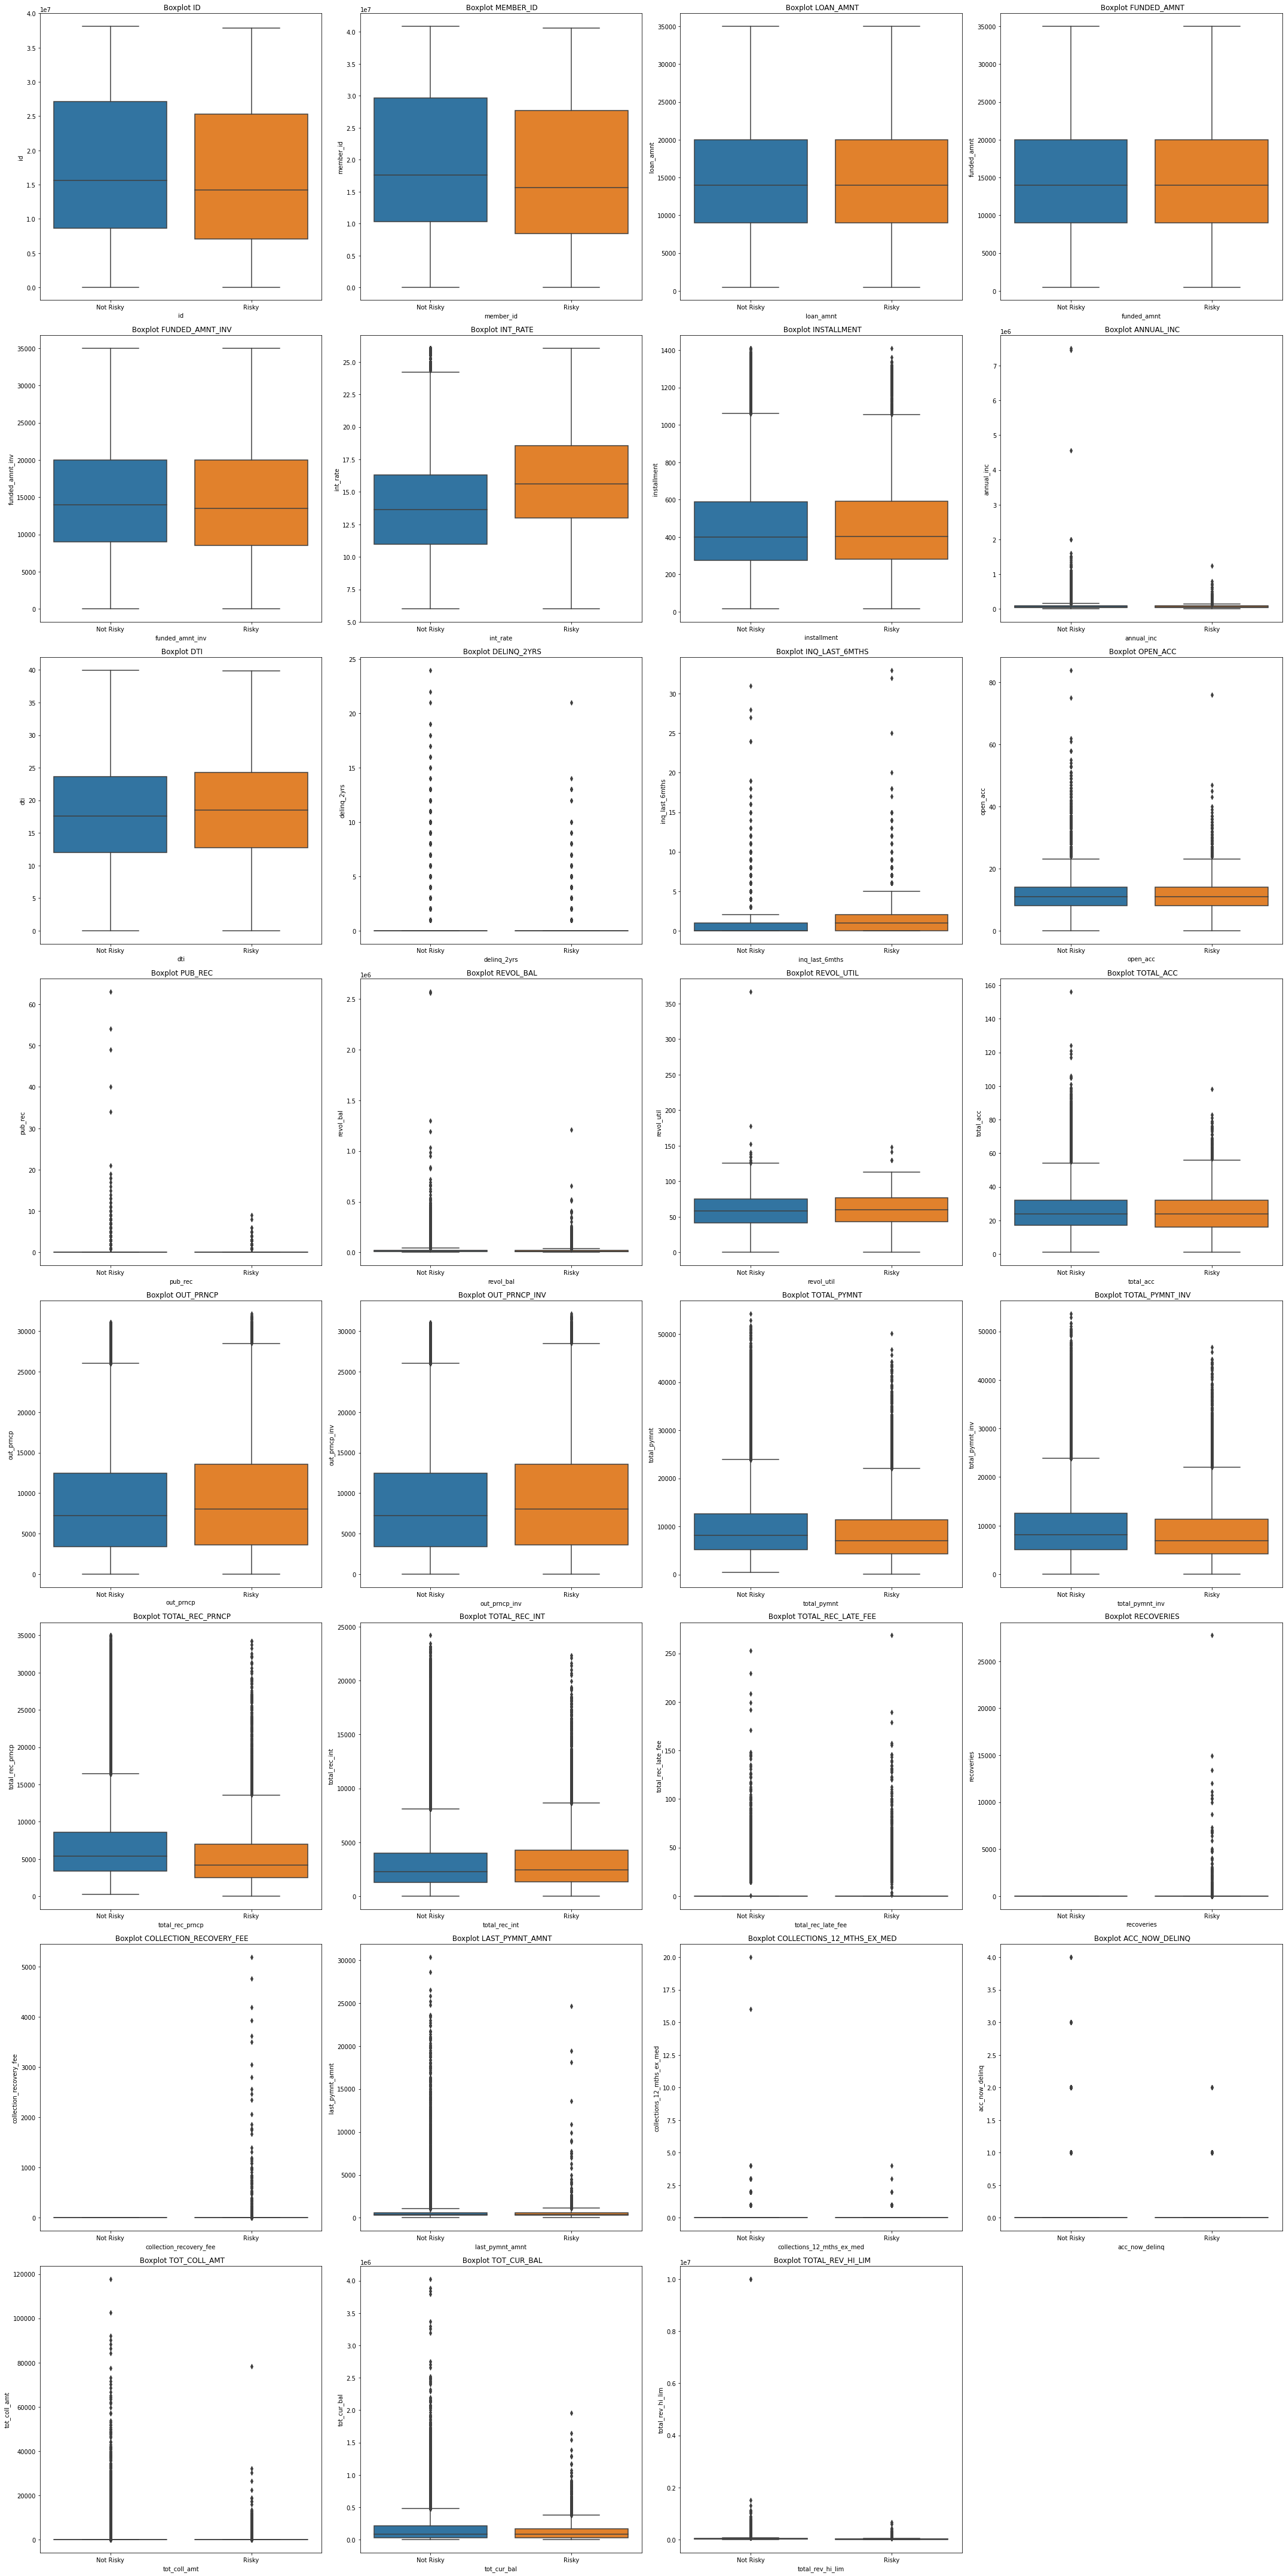

In [27]:
#Numerical Variable
plt.figure(figsize=(30,60))
for i in range(0, len(numeric_vars)):
    plt.subplot(8, 4, i+1)
    plt.title(' Boxplot ' + str(numeric_vars[i]).upper())
    sns.boxplot(y=data[numeric_vars[i]], x=data['Target'])
    plt.xlabel(numeric_vars[i])
    plt.tight_layout()

Datetime Data

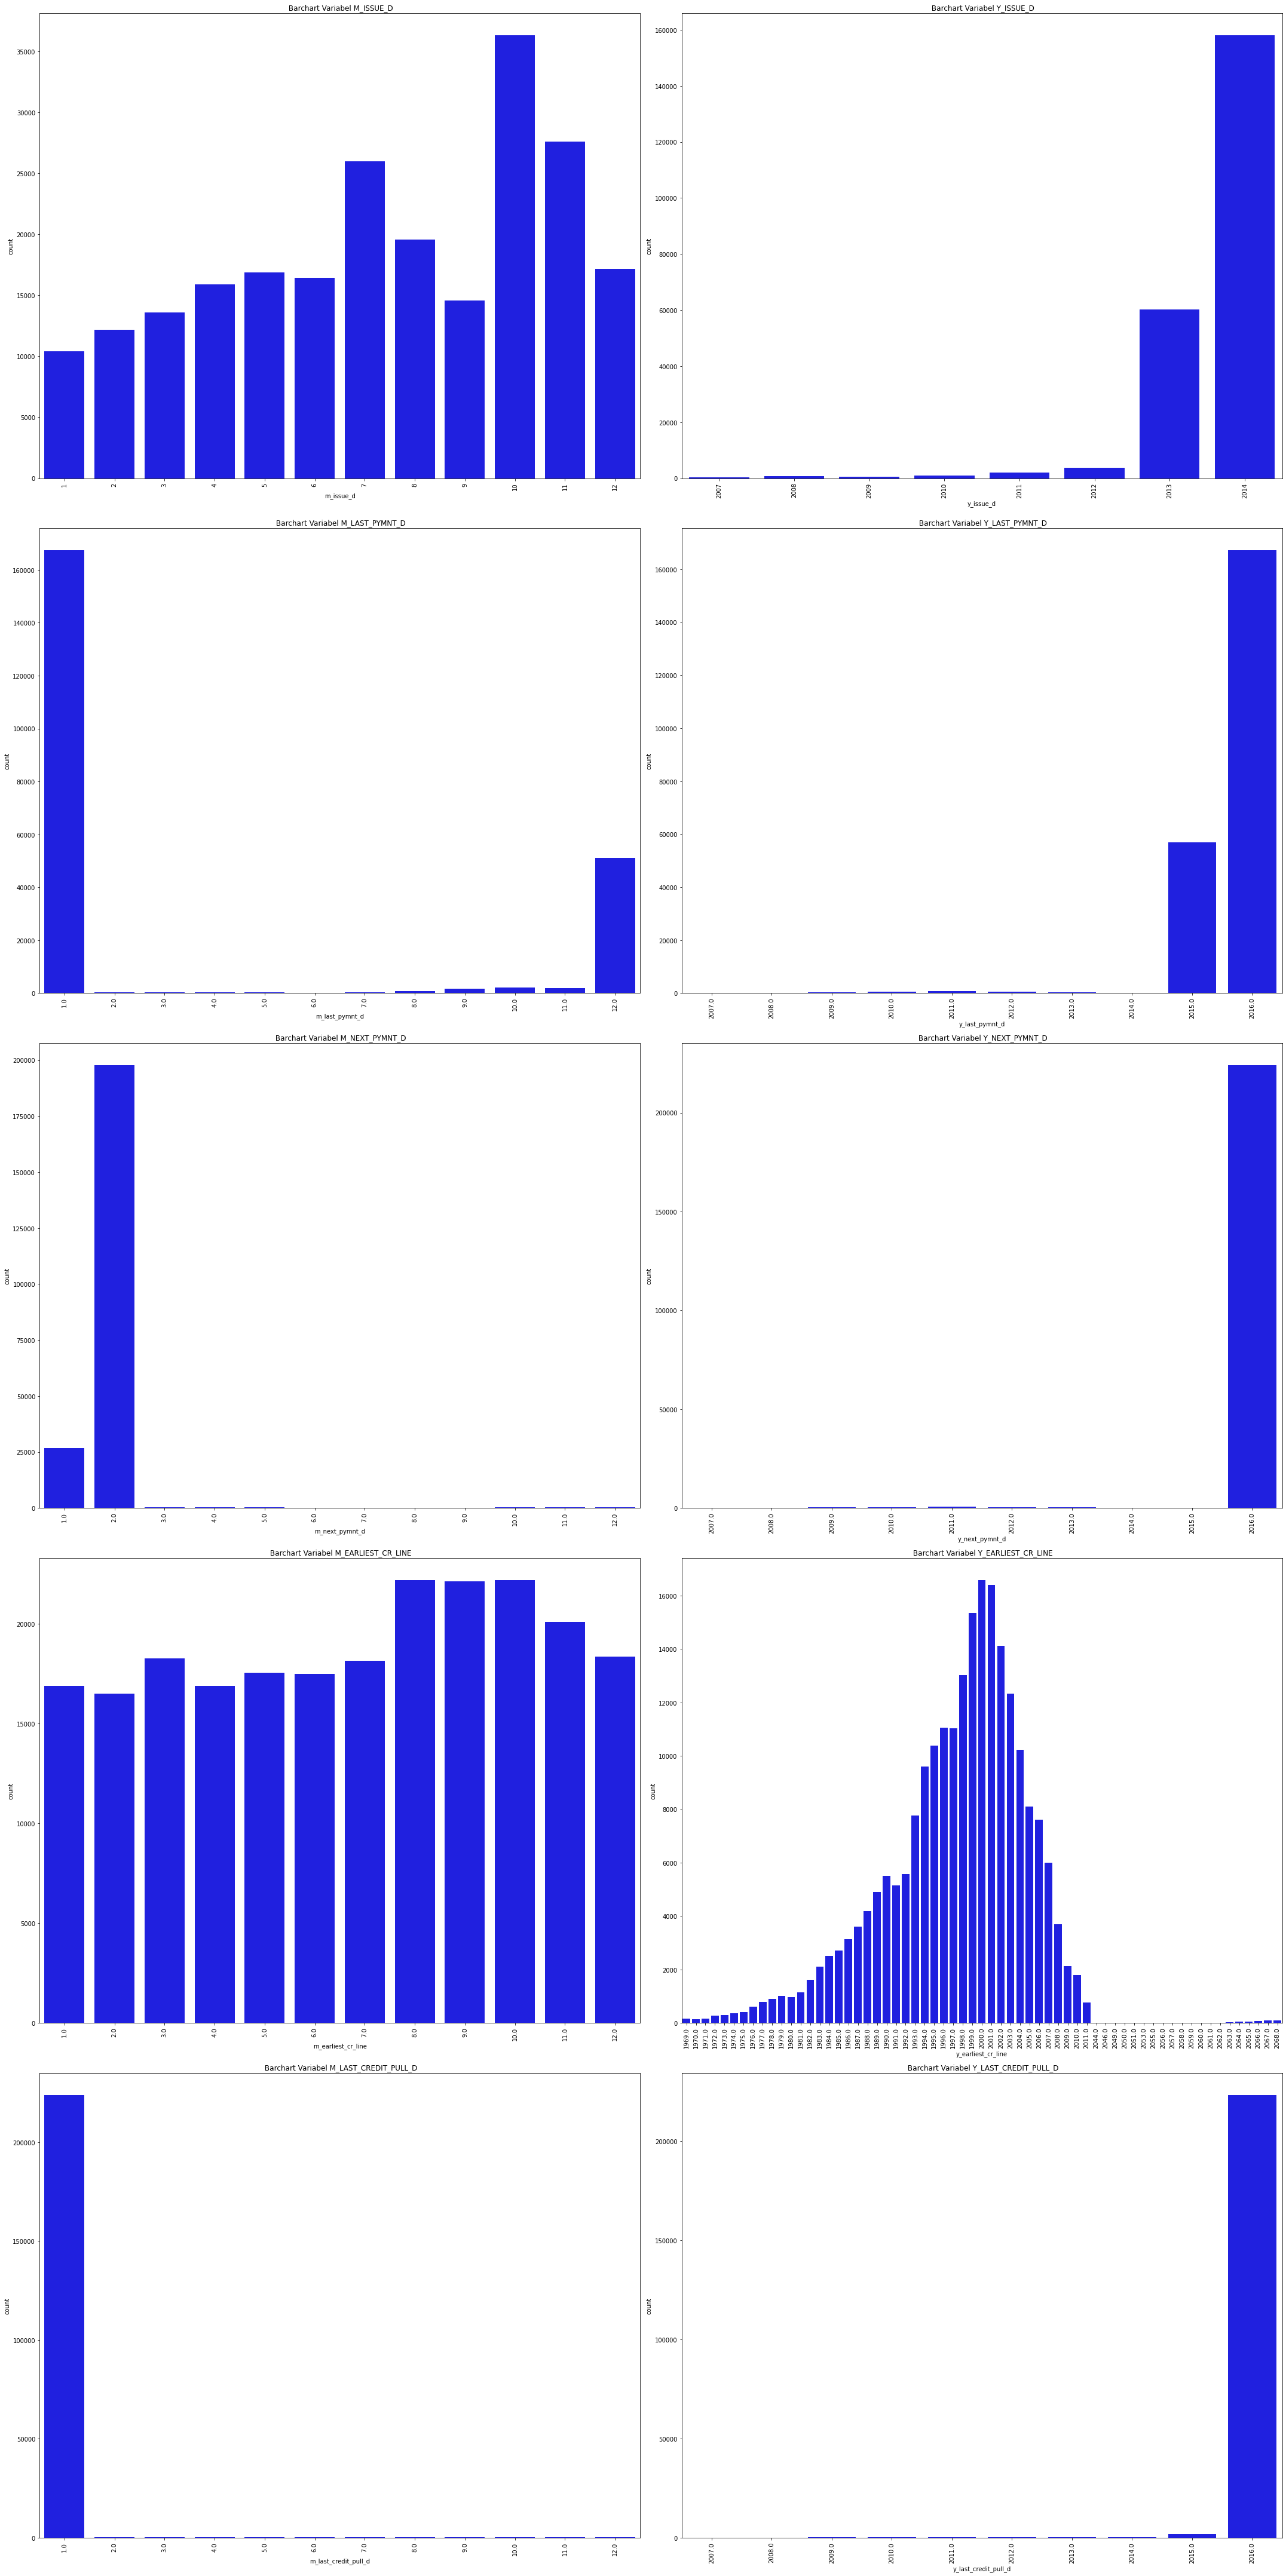

In [28]:
#Date Variable
plt.figure(figsize=(30,60))
for i in range(0, len(date_vars)):
    plt.subplot(5, 2, i+1)
    plt.title(' Barchart Variabel ' + str(date_vars[i]).upper())
    sns.countplot(x=data[date_vars[i]].sort_values(), color='blue')
    plt.xlabel(date_vars[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

# **Basic Observation for Categorical Variable**

In [29]:
#Function Definition
def credit_graphic(index, columns):
  dfp = data.pivot_table(index=index, columns=columns, aggfunc='size')
  
  dfp_prt = dfp.copy()
  dfp.iloc[0,0]
  for i in range(0, dfp.shape[0]):
    for j in range(0, dfp.shape[1]):
      dfp_prt.iloc[i,j] = dfp.iloc[i,j]/sum(dfp.iloc[i,:])

  labels = np.array(dfp_prt.index)
  bad_credit_score = np.array(dfp_prt.iloc[:,1])
  good_credit_score = np.array(dfp_prt.iloc[:,0])

  precentage = lambda x: np.round(x, 2)*100
  bad_credit = precentage(bad_credit_score)
  good_credit = precentage(good_credit_score)

  x = np.arange(len(labels))
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, bad_credit, width, label='Risky')
  rects2 = ax.bar(x + width/2, good_credit, width, label='Not Risky')
  
  ax.set_ylabel('Precentage')
  ax.set_xlabel(str(index).capitalize())
  ax.set_title('Portions of Credit_Approver by ' + str(index).capitalize() + ' and Credit')
  ax.set_xticks(x, labels)
  ax.legend()
  
  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
  fig.tight_layout()
  fig.set_size_inches(18, 9)
  
  plt.show()

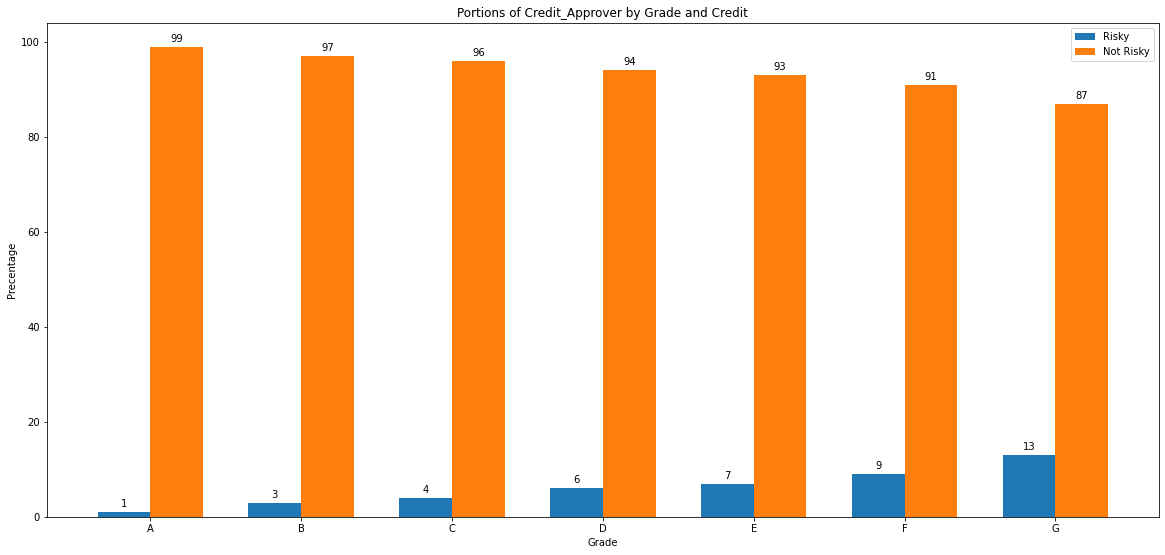

In [30]:
#Grade vs Target
credit_graphic(index='grade', columns='Target')

From the barplots, we can draw conclusion that credit_approver with grade G, more likely to have bad credit

Recommendation : avoid giving credit to grade F and G credit_aprrover

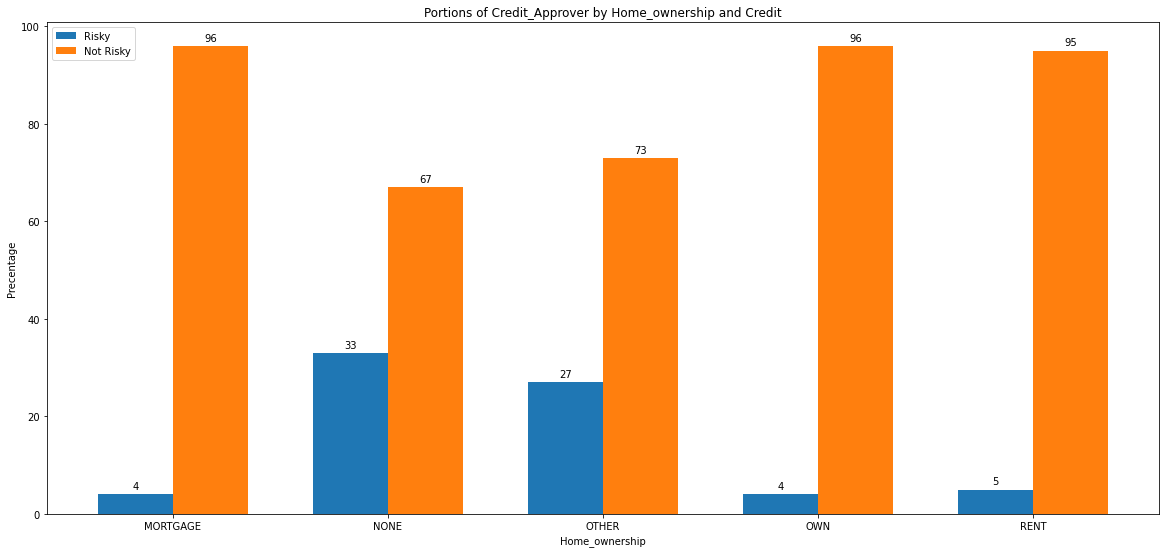

In [31]:
#home_ownership vs Target
credit_graphic(index='home_ownership', columns='Target')

From the barplots, we can draw conclusion that there is no notable difference between any home_ownership in credit conditions (good/bad credit)

Recommendation : no notable effect of home ownership to credit condition

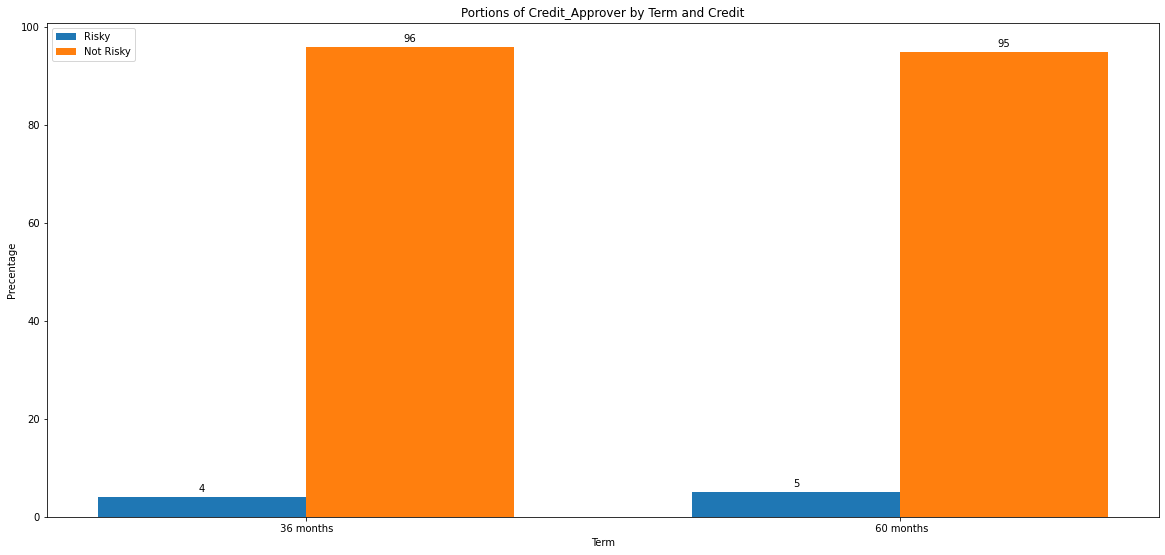

In [32]:
#Term vs Target
credit_graphic(index='term', columns='Target')

From the barplots, we can draw conclusion that there is no notable difference between term in credit conditions (good/bad credit)

Recommendation : no notable effect of term to credit condition

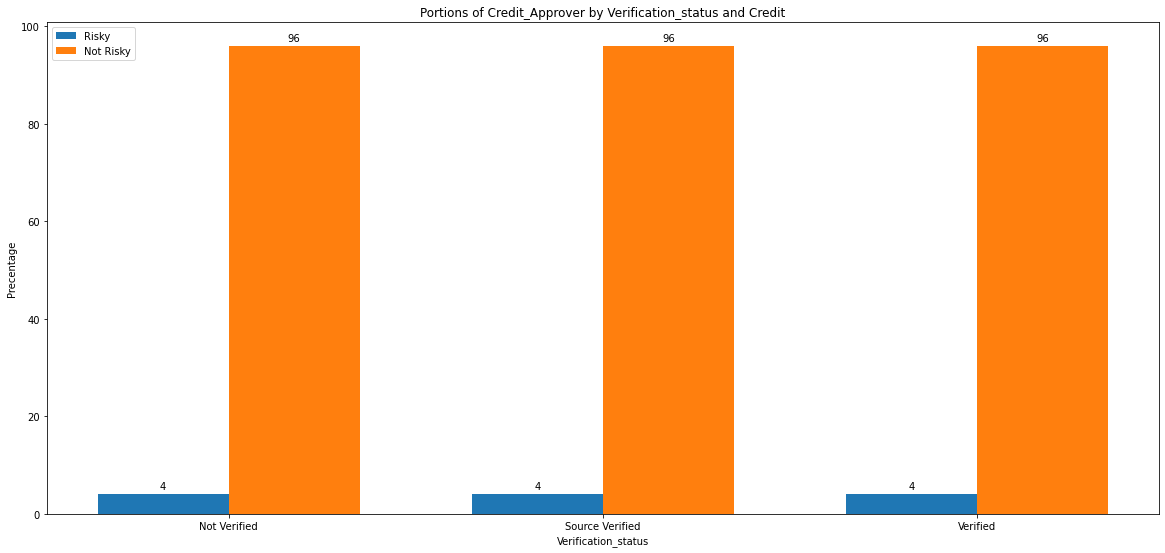

In [33]:
#Verification Status vs Target
credit_graphic(index='verification_status', columns='Target')

From the barplots, we can draw conclusion that there is no notable difference between verification status in credit conditions (good/bad credit)

Recommendation : no notable effect of verification status to credit condition

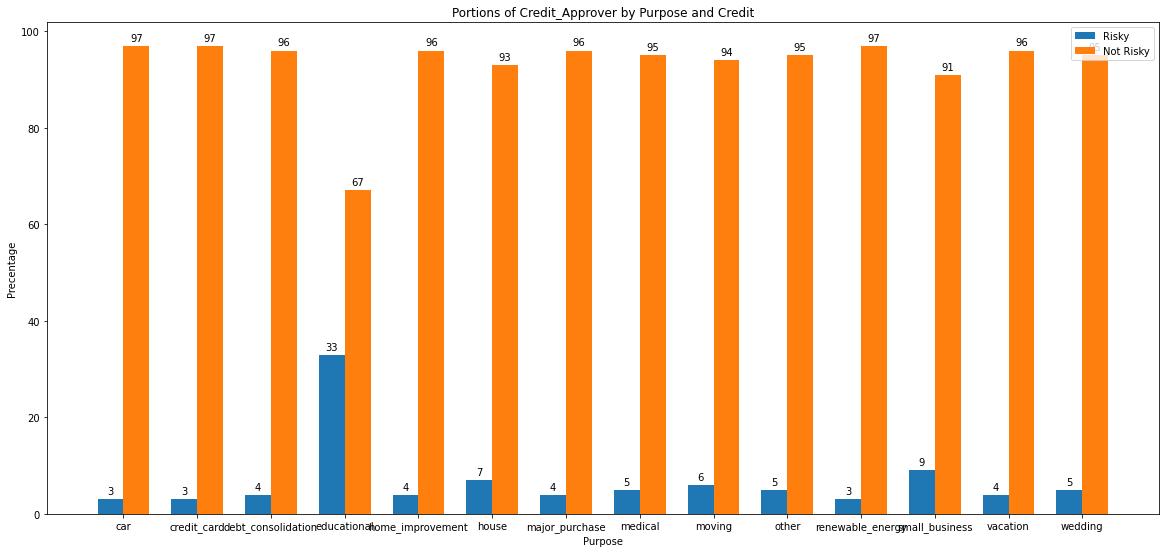

In [146]:
#Purpose vs Target
credit_graphic(index='purpose', columns='Target')

From the barplots, we can draw conclusion that educational purpose had bad_credit proportion above 20%, meanwhile another purpose had bad_credit proportion below 20%

Recommendation : avoid giving credit to credit_approver with purpose of educational, that purpose had higher chance to have a bad_credit status

# **Model Building**

In [34]:
#Peek Data
print(tabulate(data.head(10), headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═════════╤═════════════╤═════════════╤═══════════════╤═══════════════════╤═══════════╤════════════╤═══════════════╤═════════╤══════════════╤══════════════════╤══════════════╤═══════════════════════╤════════════════════╤═══════╤═══════════════╤══════════════════╤════════════╤═══════════╤═════════════╤══════════════╤═════════════╤═══════════════════════╤═════════════╤═════════════════╤═══════════════╤═══════════════════╤═══════════════════╤═════════════════╤══════════════════════╤══════════════╤═══════════════════════════╤═══════════════════╤══════════════════════════════╤══════════════════╤════════════════╤═══════════════╤════════════════════╤═══════════╤═════════════╤═════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════════╤══════════════════════╤════════════════════════╤════════════════════════╕
│     │      id │   member_id │   loan_amnt │   funded_amnt │   funded_amnt_inv │ term      │   int_rate │   installment │ grade  

**Label Encoding**

In [35]:
categorical_vars

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'Target']

In [36]:
from sklearn import preprocessing

#Fit all in categorical data
#(1)
le_grade = preprocessing.LabelEncoder()
le_grade.fit(data['grade'])
print(le_grade.classes_)
data['grade'] = le_grade.transform(data['grade'])

#(2)
le_term = preprocessing.LabelEncoder()
le_term.fit(data['term'])
print(le_term.classes_)
data['term'] = le_term.transform(data['term'])

#(3)
le_emp_length = preprocessing.LabelEncoder()
le_emp_length.fit(data['emp_length'])
print(le_emp_length.classes_)
data['emp_length'] = le_emp_length.transform(data['emp_length'])

#(4)
le_home_ownership = preprocessing.LabelEncoder()
le_home_ownership.fit(data['home_ownership'])
print(le_home_ownership.classes_)
data['home_ownership'] = le_home_ownership.transform(data['home_ownership'])

#(5)
le_verification_status = preprocessing.LabelEncoder()
le_verification_status.fit(data['verification_status'])
print(le_verification_status.classes_)
data['verification_status'] = le_verification_status.transform(data['verification_status'])

#(6)
le_purpose = preprocessing.LabelEncoder()
le_purpose.fit(data['purpose'])
print(le_purpose.classes_)
data['purpose'] = le_purpose.transform(data['purpose'])

#(7)
le_initial_list_status = preprocessing.LabelEncoder()
le_initial_list_status.fit(data['initial_list_status'])
print(le_initial_list_status.classes_)
data['initial_list_status'] = le_initial_list_status.transform(data['initial_list_status'])

#(8)
le_Target = preprocessing.LabelEncoder()
le_Target.fit(data['Target'])
print(le_Target.classes_)
data['Target'] = le_Target.transform(data['Target'])

['A' 'B' 'C' 'D' 'E' 'F' 'G']
[' 36 months' ' 60 months']
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
['MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']
['Not Verified' 'Source Verified' 'Verified']
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
['f' 'w']
['Not Risky' 'Risky']


In [37]:
print(tabulate(data.head(10), headers = 'keys', tablefmt = 'fancy_grid'))

╒═════╤═════════════╤═════════════╤═════════════╤═══════════════╤═══════════════════╤════════╤════════════╤═══════════════╤═════════╤══════════════╤══════════════════╤══════════════╤═══════════════════════╤═══════════╤═══════╤═══════════════╤══════════════════╤════════════╤═══════════╤═════════════╤══════════════╤═════════════╤═══════════════════════╤═════════════╤═════════════════╤═══════════════╤═══════════════════╤═══════════════════╤═════════════════╤══════════════════════╤══════════════╤═══════════════════════════╤═══════════════════╤══════════════════════════════╤══════════════════╤════════════════╤═══════════════╤════════════════════╤══════════╤═════════════╤═════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════════╤══════════════════════╤════════════════════════╤════════════════════════╕
│     │          id │   member_id │   loan_amnt │   funded_amnt │   funded_amnt_inv │   term │   int_rate │   installment │   grade │   emp

**Train-Test Split**

In [38]:
#Assign X Var and Y Var
X_var = []
for i in data.columns:
  X_var.append(i)
X_var.remove('Target')

Y_var = ['Target']

#Make Dataframe from Each Category
X = data[X_var]
Y = data[Y_var]

In [39]:
#Train Test Split 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

#Shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(158673, 48)
(68004, 48)
(158673, 1)
(68004, 1)


**Classifier Method**

In [ ]:
#Accuracy Method
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test):
  print("Train Accuracy:",metrics.accuracy_score(Y_train, Y_pred_train))
  print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_pred_test))
  print("Train F1-Score:",metrics.f1_score(Y_train, Y_pred_train))
  print("Test F1-Score:",metrics.f1_score(Y_test, Y_pred_test))

def confusion_matrix(Y_pred, Y_act):
  confusion_matrix = metrics.confusion_matrix(Y_act, Y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.title('Confusion Matrix')
  plt.show()

*KNeighborsClassifier*

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.9473990128694761
Test Accuracy: 0.9250090032105066
Train F1-Score: 0.9500436626746507
Test F1-Score: 0.9301890964598803


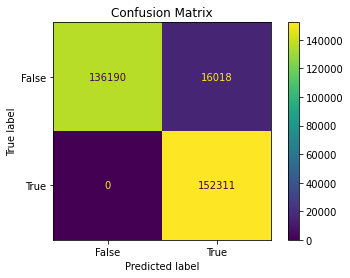

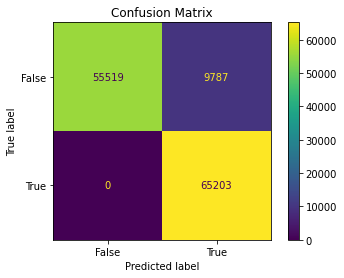

In [61]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Model
clf = KNeighborsClassifier()
clf = clf.fit(X_train,Y_train)

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

NONE_KNN = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

*Random Forest*

Train Accuracy: 1.0
Test Accuracy: 0.99949428775027
Train F1-Score: 1.0
Test F1-Score: 0.9994941443374824


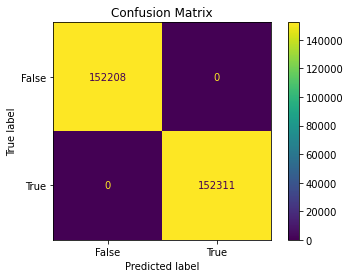

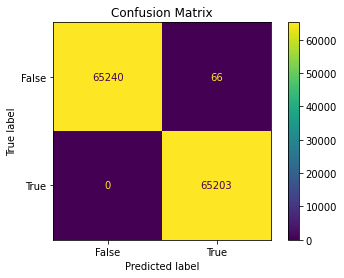

In [62]:
#Random Forest w/o resampling
from sklearn.ensemble import RandomForestClassifier

#Model
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train.values.ravel())

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

NONE_RF = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

**Decision Tree w/ Upsampling/Downsampling**

In [52]:
#Oversampling & Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_Under, Y_Under = rus.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_Over, Y_Over = ros.fit_resample(X, Y)

*Undersampling*

In [44]:
#Train Test Split 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X_Under,Y_Under,test_size=0.3, random_state=1)

#Shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12828, 48)
(5498, 48)
(12828, 1)
(5498, 1)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.9473990128694761
Test Accuracy: 0.9250090032105066
Train F1-Score: 0.9500436626746507
Test F1-Score: 0.9301890964598803


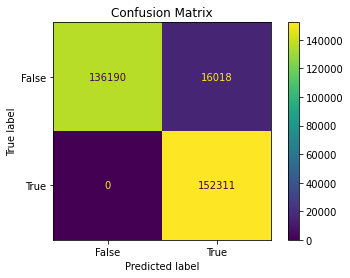

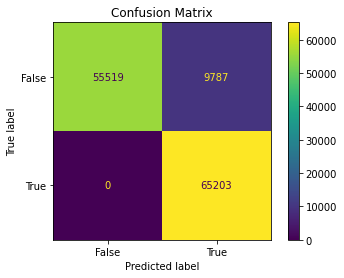

In [53]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Model
clf = KNeighborsClassifier()
clf = clf.fit(X_train,Y_train)

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

UNDER_KNN = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

Train Accuracy: 1.0
Test Accuracy: 0.9995479238979688
Train F1-Score: 1.0
Test F1-Score: 0.9995477714329513


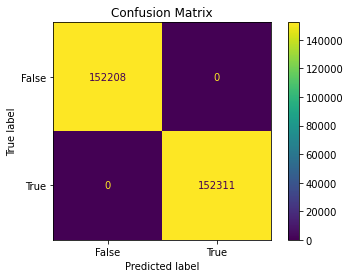

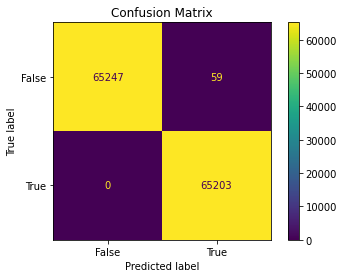

In [54]:
#Random Forest w/o resampling
from sklearn.ensemble import RandomForestClassifier

#Model
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train.values.ravel())

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

UNDER_RF = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

*Upsampling*


In [55]:
#Train Test Split 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X_Over,Y_Over,test_size=0.3, random_state=1)

#Shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(304519, 48)
(130509, 48)
(304519, 1)
(130509, 1)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.9473990128694761
Test Accuracy: 0.9250090032105066
Train F1-Score: 0.9500436626746507
Test F1-Score: 0.9301890964598803


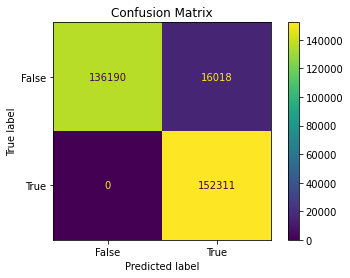

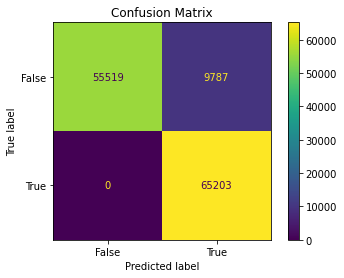

In [56]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Model
clf = KNeighborsClassifier()
clf = clf.fit(X_train,Y_train)

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

OVER_KNN = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

Train Accuracy: 1.0
Test Accuracy: 0.9995862354320392
Train F1-Score: 1.0
Test F1-Score: 0.9995860800245285


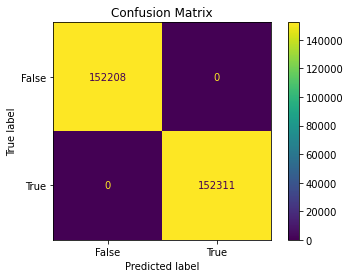

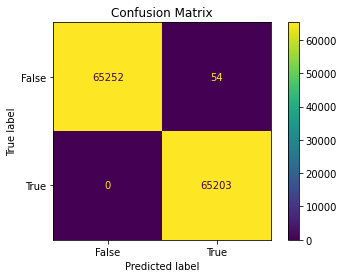

In [57]:
#Random Forest w/o resampling
from sklearn.ensemble import RandomForestClassifier

#Model
clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train.values.ravel())

#Predict
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

OVER_RF = nilaieval(Y_train, Y_test, Y_pred_train, Y_pred_test)
confusion_matrix(Y_pred_train, Y_train)
confusion_matrix(Y_pred_test, Y_test)

# **Compare Method**

Oversampling dangan metode Random Forest menghasilkan tingkat akurasi data test sebersar 99.99% sehingga terpilih sebagai model yang dapat mempredict lebih akurat.